<a href="https://colab.research.google.com/github/parulgo7/GHH22_EmployeeEmpowerment/blob/main/GirlsHooCodeHackathonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Section 1. Load Data

In [ ]:
# Import some common packages
import os
import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
import pandas as pd

def loadGapData():
  gapdata = pd.read_csv("/content/sample_data/Glassdoor Gender Pay Gap.csv")
  return gapdata

gapdata = loadGapData()


gapdata.head(10)
gapdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
gapdata['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [ ]:
gapdata.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


###Section 2. Data Discovery

In [ ]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Here we are examining correlations in the numerical data features (not that this does not include gender). We see that age and seniority seem to correlate highly with an employee's base pay.

In [ ]:
corr_matrix = gapdata.corr()
corr_matrix.shape
corr_matrix['BasePay'].sort_values(ascending=False)

BasePay      1.000000
Age          0.562681
Seniority    0.511096
PerfEval    -0.053622
Bonus       -0.129481
Name: BasePay, dtype: float64

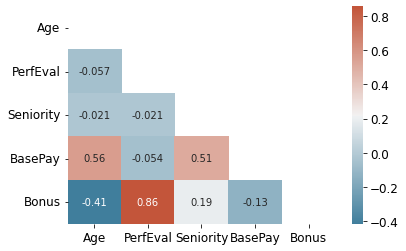

In [ ]:
import seaborn as sns

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, mask = mask, cmap=cmap)

Now we plot scatterplots of different features with one another.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f451d3e6bd0>,
      dtype=object)

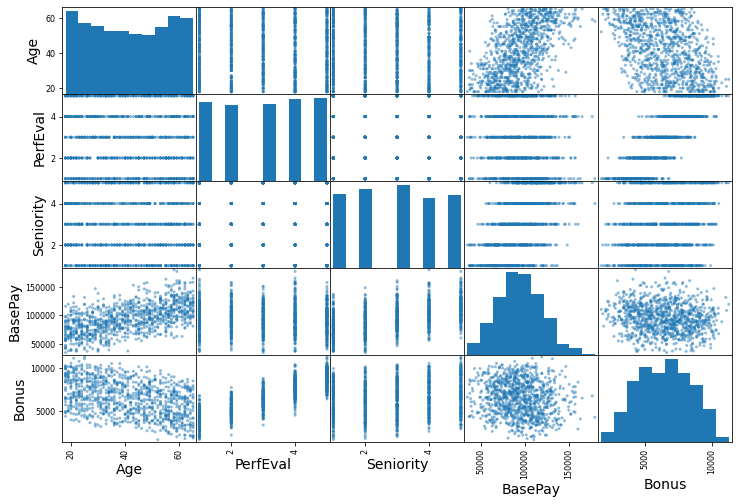

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept', 'Seniority', 'BasePay', 'Bonus']

scatter_matrix(gapdata[attributes], figsize=(12,8))

### Section 3. Feature Engineering, Data Cleaning and Standardization

In [ ]:
gapdata['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [ ]:
gapdata['Dept'].unique()

array(['Operations', 'Management', 'Administration', 'Sales',
       'Engineering'], dtype=object)

We used feature engineering to group the possible job titles in the data set into groups of job categories.

In [ ]:
def job_groups(x):
  if x == 'Graphic Designer':
    return 'Graphic Designer'
  elif x == 'Software Engineer' or x == 'IT' or x == 'Data Scientist':
    return 'Technical'
  elif x == 'Warehouse Associate' or x == 'Driver':
    return 'Non-Technical'
  elif x == 'Marketing Associate' or 'Sales Associate':
    return 'Sales/Marketing'
  elif x == 'Manager' or x == 'Financial Analyst':
    return 'Management/Finance'

gapdata['JobGroup'] = gapdata['JobTitle'].apply(job_groups)


In [ ]:
del gapdata['JobTitle']

In order to prepare the data for machine learning, we needed to treate the non-numerical and numerical features differently. So, we split the data into two groups of features, numerical and categorical.

In [ ]:
# observe numerical attributes in the raw data set
gapdata_num = gapdata.select_dtypes(include=[np.number])
gapdata_num.info()
num_attribs = list(gapdata_num)
print(num_attribs)

# observe categorical attributes in the raw data set
gapdata_cat = gapdata.select_dtypes(include=[object])
gapdata_cat.info()
cat_attribs = list(gapdata_cat)
print(cat_attribs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        1000 non-null   int64
 1   PerfEval   1000 non-null   int64
 2   Seniority  1000 non-null   int64
 3   BasePay    1000 non-null   int64
 4   Bonus      1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB
['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Education  1000 non-null   object
 2   Dept       1000 non-null   object
 3   JobGroup   1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
['Gender', 'Education', 'Dept', 'JobGroup']


Categorical data need to be encoded, but we wanted to preserve the fact that the education levels in the "Education" feature had ordering. So, we used a special type of encoding, called ordinal encoding, on this feature.

In [ ]:
# we want to manually ordinal encode "Education" so that a high school education
# is the lowest value and a PhD is the highest value
scale_mapping = {"High School":0, "College":1, "Masters": 2, "PhD":3}
gapdata["Education"] = gapdata["Education"].replace(scale_mapping)

# ensure that "Education" is now a numerical feature and not a categorical feature
cat_attribs.remove("Education")
num_attribs.append("Education")

print(cat_attribs)
print(num_attribs)

['Gender', 'Dept', 'JobGroup']
['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus', 'Education']


Then we could transform our data set using Pipelines. Now our data was ready to be used to train a machine learing model!

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_prepared = full_pipeline.fit_transform(gapdata)

## Step 4: Selecting and Training the Model

We had to try a few machine learning models before landing on one that best fit our goals and parameters. We decided on using a K Means Classifier to visualize clusters of similar employees in the data set.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=300, random_state=1)
y_pred = kmeans.fit_predict(X_prepared)

In [ ]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0,
       0, 0, 3, 2, 3, 0, 3, 3, 3, 3, 3, 2, 3, 0, 2, 3, 3, 3, 3, 0, 3, 0,
       3, 0, 2, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 3, 3, 3, 0, 3, 2, 3, 3, 0, 3, 3, 0, 3, 0,

In the model we just trained, we specified a hyperparameter, the number of clusters that the model creates. We call this hyperparameter "k". Changing this hyperparameter could affect the performance of the model.

To examine this effect, we graphed Inertia (the error in the model) vs. K to determine the optimal value of k! The best value of k is typically located at the "elbow" of the graph, where the slope starts decreasing in absolute value. We chose k = 5 (the orange point), but our graph didn't have an obvious elbow, so future work could compare the performance of models with k = 5 clusters and other similar values of k.

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

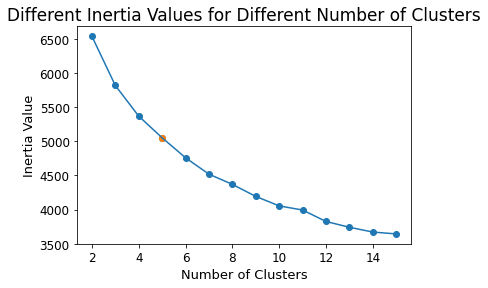

In [ ]:
inertia_list = []

for clusters in range(2,16):
  model = KMeans(n_clusters=clusters, init="random", n_init=1,
                 algorithm="full", max_iter=300, random_state=1)
  model.fit_predict(X_prepared)
  inertia_list.append(model.inertia_)

plt.plot(range(2,16),inertia_list)
plt.scatter(range(2,16),inertia_list)
plt.scatter(5, inertia_list[3])
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

Now, let's go ahead and visualize our clusters along different axises!!!

In [ ]:
gapdata

,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,JobGroup
0,Female,18,5,1,Operations,2,42363,9938,Graphic Designer
1,Male,21,5,1,Management,5,108476,11128,Technical
2,Female,19,4,3,Administration,5,90208,9268,Non-Technical
3,Male,20,5,2,Sales,4,108080,10154,Technical
4,Male,26,5,2,Engineering,5,99464,9319,Graphic Designer
...,...,...,...,...,...,...,...,...,...
995,Female,61,1,0,Administration,1,62644,3270,Sales/Marketing
996,Male,57,1,2,Sales,2,108977,3567,Technical
997,Male,48,1,0,Operations,1,92347,2724,Sales/Marketing
998,Male,65,2,0,Administration,1,97376,2225,Sales/Marketing


Next we trained our k = 5 model.

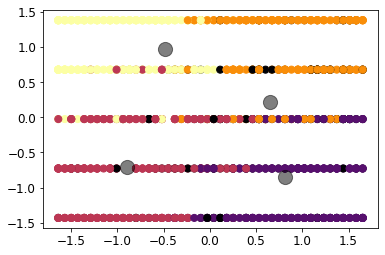

In [ ]:
model = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=300, random_state=1)
y_pred = model.fit_predict(X_prepared)


X_col = 0
Y_col = 1

plt.scatter(X_prepared[:, X_col], X_prepared[:, Y_col], c=y_pred, s=50, cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, X_col], centers[:, Y_col], c='black', s=200, alpha=0.5);


In the above plot, we have graphed the samples belonging to each cluster (each cluster is plotted in a different color). However, note the axes of this graph: this plot uses the prepared, scaled data, which makes it hard to understand the data.

To better visualize the data, we created several functions, below.

In [ ]:
print(model.cluster_centers_)

[[ 0.49081045 -0.23287913  0.98900475  1.1930729  -0.13890166  0.65433102
   0.32777778  0.67222222  0.19444444  0.23333333  0.21666667  0.15
   0.20555556  0.08888889  0.10555556  0.45555556  0.35      ]
 [ 0.90852121 -0.9874754  -0.28117615  0.30479353 -1.29338218 -0.22894773
   0.6         0.4         0.23157895  0.14210526  0.14736842  0.25263158
   0.22631579  0.08421053  0.16315789  0.47368421  0.27894737]
 [-0.83606922 -0.68690784 -0.38200673 -0.8589218  -0.37853078 -0.37204181
   0.47031963  0.52968037  0.19178082  0.17351598  0.23287671  0.21004566
   0.19178082  0.09589041  0.20091324  0.39726027  0.30593607]
 [ 0.77322964  0.9386155  -0.3479262   0.19037316  0.43605937 -0.30088202
   0.43502825  0.56497175  0.13559322  0.16949153  0.20338983  0.24858757
   0.24293785  0.12429379  0.22033898  0.37853107  0.27683616]
 [-0.91763845  0.91383096  0.08822661 -0.50536781  1.18145575  0.2583494
   0.49145299  0.50854701  0.20512821  0.23504274  0.18803419  0.19230769
   0.17948718  

##Part 5: Visualizing the Clustered Data & Finding Insights

First, we calculated statistics for each of the clusters, including the mean and standard deviation for each numerical feature and the percentages of all the categorical feature values.

For example, we found that Cluster 0 had a mean base pay of $124,687 and was approximately 2/3 male.

In [ ]:
means = []
std_devs = []
percent_female = []
numeric_feature_stats = []
cat_feature_stats = []

for i in range(len(model.cluster_centers_)): # for each cluster that the model made
  indices = np.where(model.labels_ == i)[0]
  raw_cluster_samples = gapdata.iloc[indices]
  cluster_samples = X_prepared[indices]

  cluster_feature_means = raw_cluster_samples.mean(axis=0, numeric_only=True)
  cluster_feature_std_devs = raw_cluster_samples.std(axis=0, numeric_only=True)
  means.append(cluster_feature_means)
  std_devs.append(cluster_feature_std_devs)

  print("Cluster", i)
  stats = { 'Mean': cluster_feature_means, 'Standard Deviation': cluster_feature_std_devs }
  stats = pd.DataFrame(stats)
  print(stats)
  numeric_feature_stats.append(stats)

  gender = raw_cluster_samples["Gender"].value_counts().rename_axis('Gender').reset_index(name='GenderPercentage')
  gender["GenderPercentage"] = gender["GenderPercentage"] / len(raw_cluster_samples)
  dept = raw_cluster_samples["Dept"].value_counts().rename_axis('Dept').reset_index(name='DeptPercentage')
  dept["DeptPercentage"] = dept["DeptPercentage"] / len(raw_cluster_samples)
  jobGroups = raw_cluster_samples["JobGroup"].value_counts().rename_axis('JobGroup').reset_index(name='JobGroupPercentage')
  jobGroups["JobGroupPercentage"] = jobGroups["JobGroupPercentage"] / len(raw_cluster_samples)
  cat_stats = pd.concat([gender, dept, jobGroups], axis=1)
  cat_feature_stats.append(cat_stats)
  print(gender)
  print(dept)
  print(jobGroups, "\n")
#print(numeric_feature_stats)
#print(cat_feature_stats)

Cluster 0
                    Mean  Standard Deviation
Age            48.405556           11.791341
PerfEval        2.705556            1.189795
Education       2.200000            0.848265
Seniority       4.350000            0.808302
BasePay    124687.011111        18062.553731
Bonus        6188.888889         1379.881955
   Gender  GenderPercentage
0    Male          0.672222
1  Female          0.327778
             Dept  DeptPercentage
0     Engineering        0.233333
1      Management        0.216667
2           Sales        0.205556
3  Administration        0.194444
4      Operations        0.150000
           JobGroup  JobGroupPercentage
0   Sales/Marketing            0.455556
1         Technical            0.350000
2     Non-Technical            0.105556
3  Graphic Designer            0.088889 

Cluster 1
                    Mean  Standard Deviation
Age            54.373684            7.355115
PerfEval        1.631579            0.706023
Education       1.210526            1.09

##Visualization Method 1: Examine the Whole Data Set

With our graph_features() function, a user can input two features of interest to be plotted against each other.

The data points can be plotted with two color schemes: the first, indicated with the third argument being "True", symbolizes data by gender, with male employees in purple and female employees in green. The second color symbolizes data by cluster; each cluster is plotted in a different color family, with female members of those clusters appearing in a darker shade than the male members.

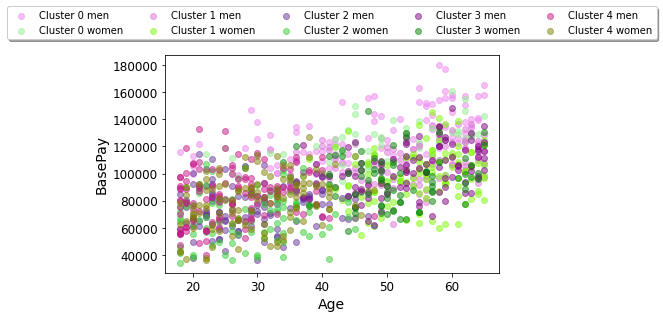

In [ ]:
colors1 = ["OrangeRed", "LightSalmon", "PaleVioletRed", "LightPink", "RebeccaPurple", "MediumPurple", "MediumSeaGreen", "LightGreen", "SteelBlue", "LightSteelBlue"]
colors2 = ["LightGreen", "Violet", "LawnGreen", "Orchid", "LimeGreen", "RebeccaPurple", "Green", "Purple", "Olive", "MediumVioletRed"]

def graph_features(feature_1, feature_2, by_gender=True):
  if by_gender:
    colors = colors2
  else:
    colors = colors1
  for i in range(len(model.cluster_centers_)): # for each cluster that the model made
    indices = np.where(model.labels_ == i)[0]
    raw_cluster_samples = gapdata.iloc[indices]
    cluster_samples = X_prepared[indices]
    women = raw_cluster_samples.loc[raw_cluster_samples['Gender'] == 'Female']
    men = raw_cluster_samples.loc[raw_cluster_samples['Gender'] == 'Male']

    plt.scatter(men[feature_1], men[feature_2], alpha=0.5, label=("Cluster "+str(i)+" men"), color=colors[i*2+1])
    plt.scatter(women[feature_1], women[feature_2], alpha=0.5, label=("Cluster "+str(i)+" women"), color=colors[i*2])
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True, shadow=True)

graph_features("Age", "BasePay")

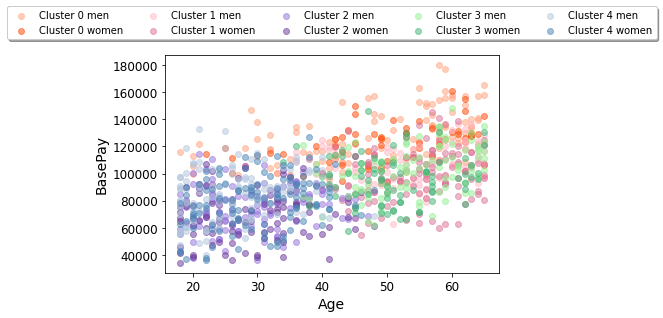

In [ ]:
graph_features("Age", "BasePay", False)

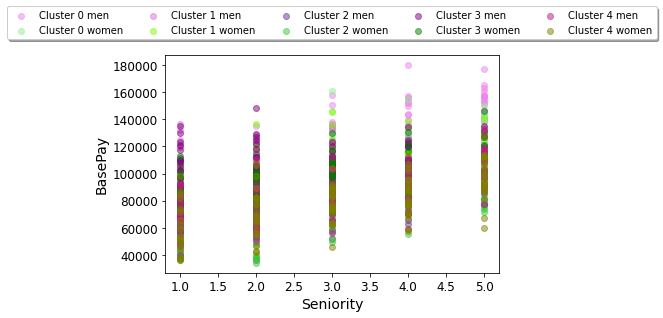

In [ ]:
graph_features("Seniority", "BasePay")

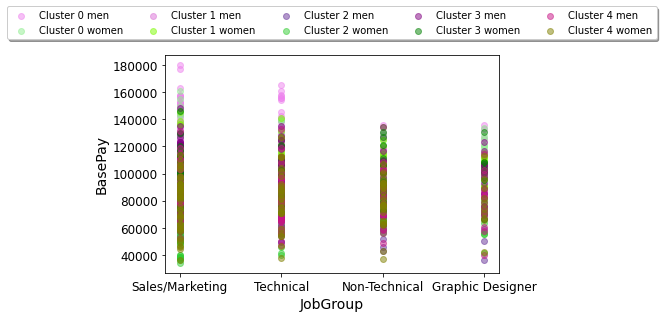

In [ ]:
graph_features("JobGroup", "BasePay")

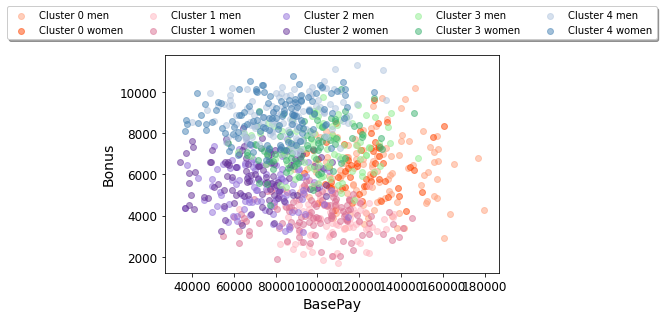

In [ ]:
graph_features("BasePay", "Bonus", False)

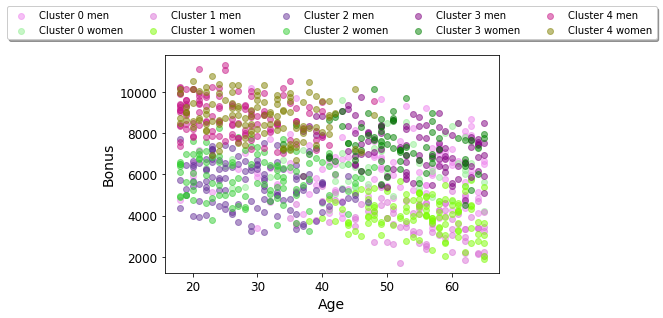

In [ ]:
graph_features("Age", "Bonus")

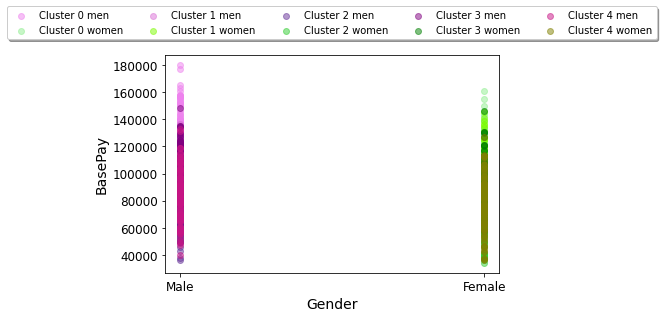

In [ ]:
graph_features("Gender", "BasePay")

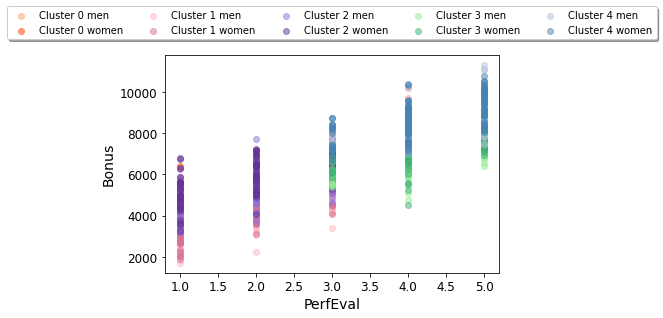

In [ ]:
graph_features("PerfEval", "Bonus", False)

## Visualization Method 2: Plot Gender Percentage Trends per Cluster

With this visualization method, a user can input a numerical feature. Then, they will get back a scatterplot relating each cluster's gender makeup to its mean for that numerical feature. A trendline is included on the plot to allow overall trends relating to gender makeup to be seen.

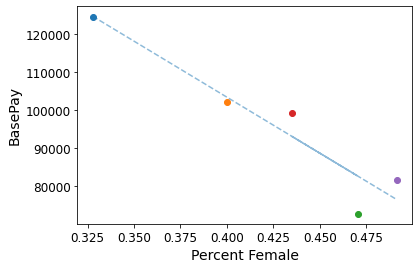

In [ ]:
def plot_cluster_gender_percentages(numerical_feature):
  x_axis = []
  y_axis = []
  for i in range(len(model.cluster_centers_)): # for each cluster that the model made
    amnt_female = cat_feature_stats[i]
    amnt_female = amnt_female.loc[1]["GenderPercentage"]
    num_feature = numeric_feature_stats[i]["Mean"][numerical_feature]
    x_axis.append(amnt_female)
    y_axis.append(num_feature)
    plt.scatter(amnt_female, num_feature, alpha=1)
    plt.xlabel("Percent Female")
    plt.ylabel(numerical_feature)
  fit = np.polyfit(x_axis, y_axis, 1)
  p = np.poly1d(fit)
  plt.plot(x_axis, p(x_axis), "--", alpha = 0.5)

plot_cluster_gender_percentages("BasePay")

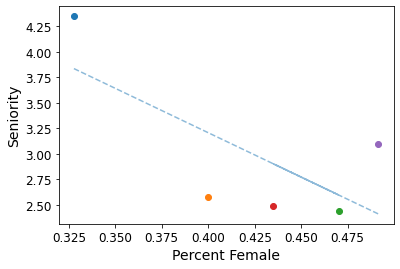

In [ ]:
plot_cluster_gender_percentages("Seniority")

As seen above, as the percent of women in a cluster increases, the average pay and seniority of the cluster tends to decrease.

##Visualization Method 3: Examine Clusters Independently

With this visualization technique, a user can examine a single cluster/group of employees at a time, again choosing two features of interest to be plotted against each other. We have again symbolized the men in each cluster with purple and the women in green.

In [ ]:
def graph_clusters(feature_1, feature_2, cluster_num):
  indices = np.where(model.labels_ == cluster_num)[0]
  raw_cluster_samples = gapdata.iloc[indices]
  cluster_samples = X_prepared[indices]
  women = raw_cluster_samples.loc[raw_cluster_samples['Gender'] == 'Female']
  men = raw_cluster_samples.loc[raw_cluster_samples['Gender'] == 'Male']

  plt.figure(cluster_num)
  plt.scatter(men[feature_1], men[feature_2], alpha=0.5,
              label=("Cluster "+str(cluster_num)+" men"),
              color=colors2[cluster_num*2+1])
  plt.scatter(women[feature_1], women[feature_2], alpha=0.5,
              label=("Cluster "+str(cluster_num)+" women"),
              color=colors2[cluster_num*2])
  plt.xlabel(feature_1)
  plt.ylabel(feature_2)
  plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=5,
             fancybox=True, shadow=True)

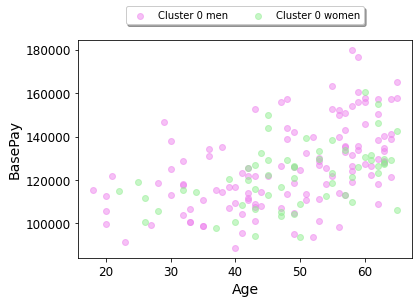

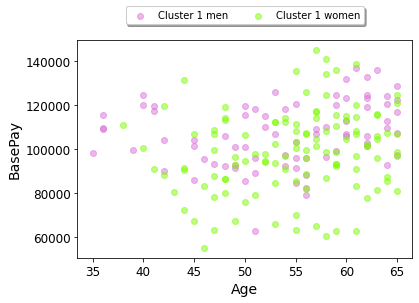

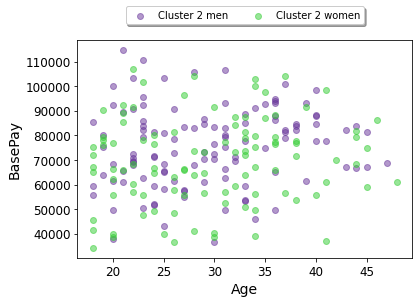

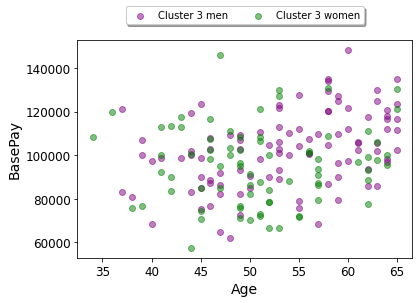

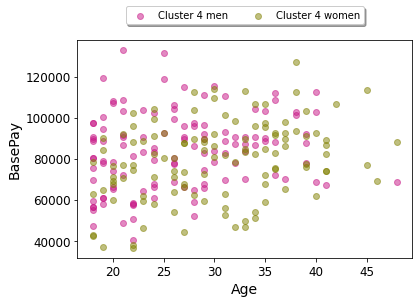

In [ ]:
for i in range(len(model.cluster_centers_)):
  graph_clusters("Age", "BasePay", i)

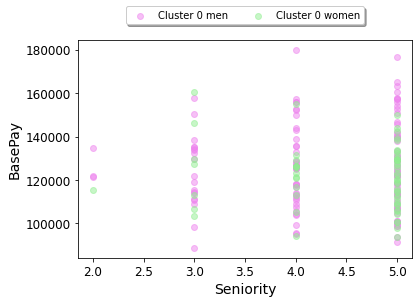

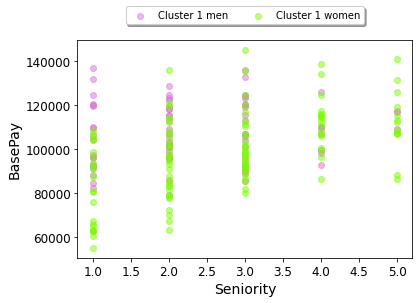

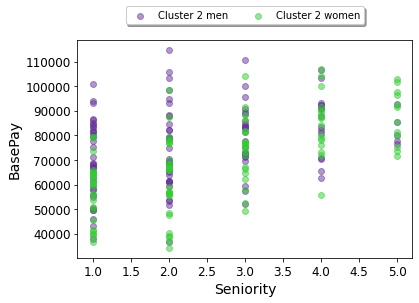

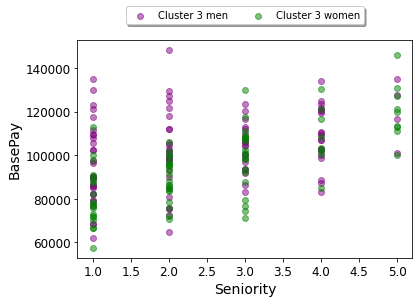

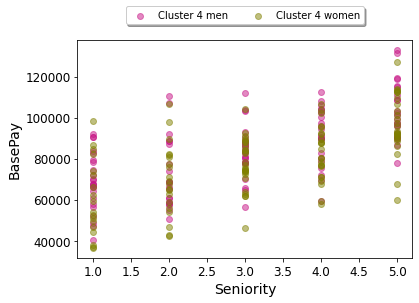

In [ ]:
for i in range(len(model.cluster_centers_)):
  graph_clusters("Seniority", "BasePay", i)

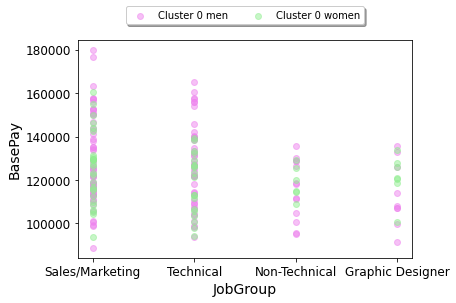

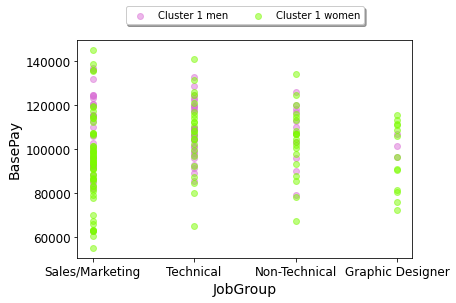

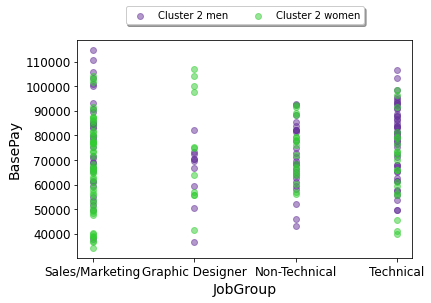

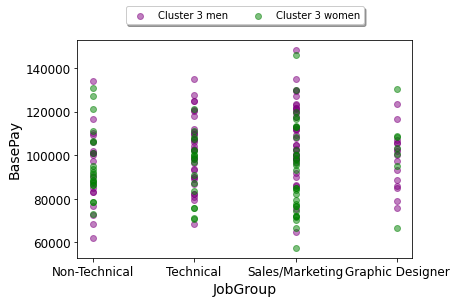

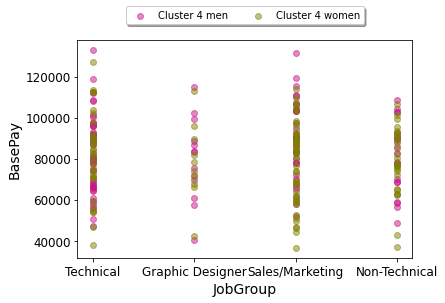

In [ ]:
for i in range(len(model.cluster_centers_)):
  graph_clusters("JobGroup", "BasePay", i)

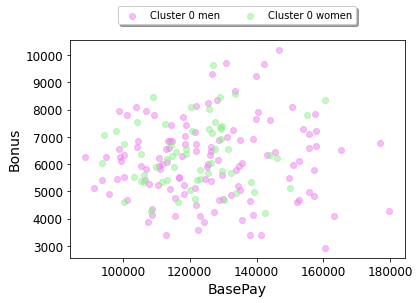

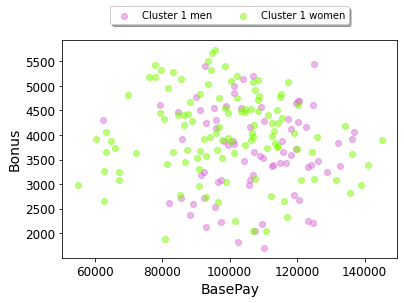

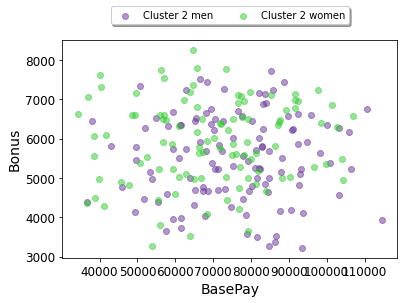

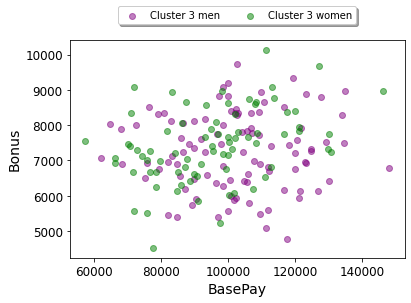

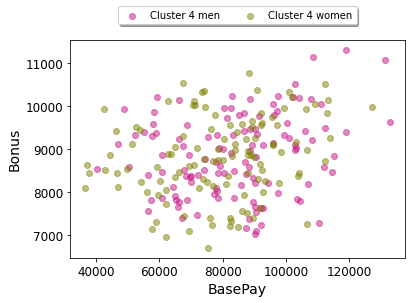

In [ ]:
for i in range(len(model.cluster_centers_)):
  graph_clusters("BasePay", "Bonus", i)